# **MODULO 4 - Model Development**

**Curso:** Ciencia y analitica de Datos  
**Matricula:** A01793718  
**Nombre:** Cristian Reynaldo Miranda Jimenez  



# **Linear and Multiple Linear Regression**

Linear Regression will refer to one independent variable to make a prediction.  
Multiple Linear Regression will refer to multiple independent variables to make a prediction.  
  
- Predictor(independent) variable -> X
- Target (dependent) variable -> y
- Intercept -> $ \beta_{0} $
- Slope -> $ \beta_{1} $


### Simple LR  
$ y = \beta_{0} + \beta_1 X $  
  
### Multiple LR  
$ y = \beta_{0} + \beta_1 X_1 + \beta_2 X_2  + \beta_3 X_3 ... $  

In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Data
names_auto = ["symboling",
 "normalized_losses",
 "make",
 "fuel_type",
 "aspiration",
 "doors",
 "body_style",
 "drive_wheels",
 "engine_location",
 "wheel_base",
 "length",
 "width",
 "height",
 "curb_weigth",
 "engine_type",
 "cylinders",
 "engine_size",
 "fuel_system",
 "bore",
 "stroke",
 "compression_ratio",
 "horsepower",
 "peak_rpm",
 "city_mpg",
 "highwway_mpg",
 "price"
 ]

autos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names=names_auto)
autos["price"] = autos["price"].replace("?",np.nan).astype(float)
autos["horsepower"] = autos["horsepower"].replace("?",np.nan).astype(float)
autos["highwway_mpg"] = autos["highwway_mpg"].replace("?",np.nan).astype(float)
autos.dropna(inplace=True)
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highwway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


In [5]:
# Fitting models in python
from sklearn.linear_model import LinearRegression

In [18]:
# Simple Linear Regression
lm = LinearRegression()
x = autos[["highwway_mpg"]]
y = autos["price"]

lm.fit(x,y)

yhat = lm.predict(x)
print("intercept:", lm.intercept_)
print("\n slope:", lm.coef_)

intercept: 38450.0041882109

 slope: [-821.50472215]


In [19]:
# Multiple Linear Regression
lm = LinearRegression()
z = autos[["horsepower","curb_weigth","engine_size","highwway_mpg"]]
y = autos["price"]

lm.fit(z,y)

yhat = lm.predict(z)
print("intercept:", lm.intercept_)
print("\n slope:", lm.coef_)

intercept: -15700.5739790393

 slope: [53.27878556  4.66217408 82.22948394 35.5175845 ]


## **Model Evaluation using Visualization**

Using regression plot give us a good estimation of:
- Relationship between 2 variables
- Strength correlation
- Direction of relationship

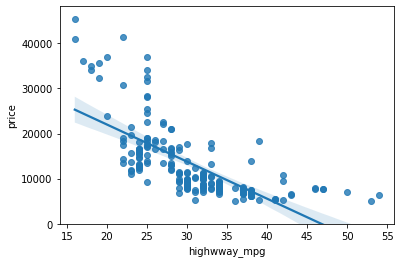

In [21]:
# Regression plot
sns.regplot(x="highwway_mpg",y="price",data=autos)
plt.ylim(0,)
plt.show()

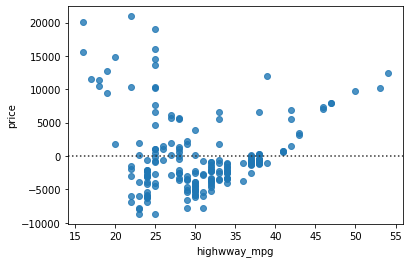

In [22]:
# Residual plot
sns.residplot(x="highwway_mpg",y="price",data=autos)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


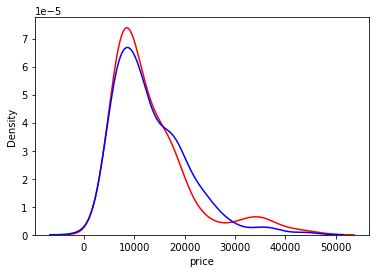

In [25]:
# Distribution plot
ax1 = sns.distplot(autos["price"],hist=False,color="r",label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

## **Polynomial Regression and Pipelines**
This is a spetial case of the general linear regression model and is useful for describing curvilinear relationships:  
  
- Cuadratic:
$ \hat{y} = \beta_{0} + \beta_1 X^2 $  

- Cubic:
$ \hat{y} = \beta_{0} + \beta_1 X^2 + \beta_2 X^3 $  

In [38]:
# Polynomial regression 3rd order
x = autos["highwway_mpg"]
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(f) #x3 + x2 + x1 + c

[-1.55294738e+00  2.04296183e+02 -8.94785018e+03  1.37721655e+05]


In [42]:
# Polynomial Regression with more than one dim

from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2, include_bias = False)

x_polly = pr.fit_transform(z[["horsepower","curb_weigth"]])
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       [1.0200000e+02, 2.3370000e+03, 1.0404000e+04, 2.3837400e+05,
        5.4615690e+06],
       [1.1500000e+02, 2.8240000e+03, 1.3225000e+04, 3.2476000e+05,
        7.9749760e+06],
       [1.1000000e+02, 2.5070000e+03, 1.2100000e+04, 2.7577000e+05,
        6.2850490e+06],
       [1.1000000e+02, 2.8440000e+03, 1.2100000e+04, 3.1284000e+05,
        8.0883360e+06],
       [1.1000000e+02, 2.9540000e+03, 1.2100000e+04, 3.2494000e+05,
        8.7261160e+06],
       [1.4000000e+02, 3.0860000e+03, 1.9600000e+04, 4.3204000e+05,
        9.5233960e+06],
       [1.0100000e+02, 2.3950000e+03, 1.0201000e+04, 2.4189500e+05,
        5.7360250e+06],
       [1.0100000e+02, 2.3950000e+03, 1.0201000e+04, 2.4189500e+05,
        5.73

In [43]:
# Standarizing before modeling
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(z[["horsepower","curb_weigth"]])

x_scale = SCALE.transform(z[["horsepower","curb_weigth"]])

In [57]:
# Pipeline Constructor
from sklearn.pipeline import Pipeline

Input = [('scale',StandardScaler()),
         ('polynomial',PolynomialFeatures(degree=2, include_bias = False)),
         ('model', LinearRegression())
         ]

pipe = Pipeline(Input)

pipe.train(z,y)
pipe.predict(z,y)

## **Measures for In-Sample Evaluation**

A way to numerically determine how good a model fits on dataset is by using these two measures:
- **Mean Squared Error (MSE):** 
- **R-squared (R^2):** is a measure to determine how close the data is to the fitted regression line



In [62]:
from sklearn.metrics import mean_squared_error

print("RMSE: ",mean_squared_error(y,yhat))
print("\n R^2: ",lm.score(z,y) )

RMSE:  11941505.191703446

 R^2:  0.811469396425812


## **Prediction and Decision Making**

In [72]:
lm = LinearRegression()
lm.fit(autos[["highwway_mpg"]],autos["price"])
print(lm.predict([[30]]))
print(lm.coef_)

[13804.86252368]
[-821.50472215]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
